In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas_summary import DataFrameSummary
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

df_test=pd.read_excel(r'C:\Users\lenovo\Desktop\IMS PRO\Participants Data\test.xlsx')
df_train=pd.read_excel(r'C:\Users\lenovo\Desktop\IMS PRO\Participants Data\train.xlsx')

In [2]:
df_train.shape , df_test.shape

((11094, 9), (2774, 8))

In [3]:
df_train.shape

(11094, 9)

In [4]:
df_train.dtypes

Restaurant       object
Location         object
Cuisines         object
Average_Cost     object
Minimum_Order    object
Rating           object
Votes            object
Reviews          object
Delivery_Time    object
dtype: object

In [5]:
df_train.Average_Cost.value_counts()

₹200      3241
₹100      2557
₹150      2462
₹250       881
₹300       537
₹350       283
₹400       282
₹50        265
₹600       154
₹500       101
₹450        63
₹550        60
₹650        55
₹800        44
₹750        38
₹900        15
₹700        15
₹850        12
₹1,000      12
₹1,200       8
₹950         4
₹2,050       1
for          1
₹1,150       1
₹1,100       1
₹1,400       1
Name: Average_Cost, dtype: int64

In [6]:
df_train = df_train[df_train.Average_Cost != 'for']

In [7]:
df_train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [8]:
import re
df_train['Average_Cost(₹)'] = df_train['Average_Cost'].apply(lambda x: re.search(r'\d+', x).group()).astype(int)
df_train['Restaurant ID'] = df_train['Restaurant'].apply(lambda x: re.search(r'\d+', x).group()).astype(int)
df_train['Minimum_Order(₹)'] = df_train['Minimum_Order'].apply(lambda x: re.search(r'\d+', x).group()).astype(int)
df_train['Delivery_Time(Min)'] = df_train['Delivery_Time'].apply(lambda x: re.search(r'\d+', x).group()).astype(int)
df_train.drop(['Restaurant','Minimum_Order','Delivery_Time','Average_Cost'],axis=1,inplace=True)

df_test['Average_Cost(₹)'] = df_test['Average_Cost'].apply(lambda x: re.search(r'\d+', x).group()).astype(int)
df_test['Restaurant ID'] = df_test['Restaurant'].apply(lambda x: re.search(r'\d+', x).group()).astype(int)
df_test['Minimum_Order(₹)'] = df_test['Minimum_Order'].apply(lambda x: re.search(r'\d+', x).group()).astype(int)
df_test.drop(['Restaurant','Minimum_Order','Average_Cost'],axis=1,inplace=True)

In [9]:
df_train.dtypes

Location              object
Cuisines              object
Rating                object
Votes                 object
Reviews               object
Average_Cost(₹)        int32
Restaurant ID          int32
Minimum_Order(₹)       int32
Delivery_Time(Min)     int32
dtype: object

In [10]:
df_train.head()

,Location,Cuisines,Rating,Votes,Reviews,Average_Cost(₹),Restaurant ID,Minimum_Order(₹),Delivery_Time(Min)
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",3.5,12,4,200,6321,50,30
1,"Sector 3, Marathalli","Ice Cream, Desserts",3.5,11,4,100,2882,50,30
2,Mumbai Central,"Italian, Street Food, Fast Food",3.6,99,30,150,1595,50,65
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",3.7,176,95,250,5929,99,30
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",3.2,521,235,200,6123,99,65


In [11]:
df_train.Rating.value_counts()

-                     1191
3.7                    869
3.6                    846
3.5                    818
3.8                    800
NEW                    757
3.9                    749
3.4                    718
3.3                    675
4.0                    614
3.2                    511
4.1                    459
3.1                    411
3.0                    302
4.2                    272
4.3                    247
2.9                    199
2.8                    157
4.4                    142
4.5                     78
2.7                     76
2.6                     42
4.6                     41
4.7                     36
2.5                     27
2.4                     13
4.8                     13
Opening Soon            12
4.9                      8
2.3                      6
Temporarily Closed       2
2.1                      1
2.2                      1
Name: Rating, dtype: int64

In [12]:
df_train = df_train[df_train.Rating != 'Temporarily Closed']

In [13]:
df_train.dtypes

Location              object
Cuisines              object
Rating                object
Votes                 object
Reviews               object
Average_Cost(₹)        int32
Restaurant ID          int32
Minimum_Order(₹)       int32
Delivery_Time(Min)     int32
dtype: object

In [14]:
df_train=df_train.replace('-',np.NaN)
df_train=df_train.replace('NEW',np.NaN)
df_train=df_train.replace('Opening Soon',np.NaN)

df_test=df_test.replace('-',np.NaN)
df_test=df_test.replace('NEW',np.NaN)
df_test=df_test.replace('Opening Soon',np.NaN)

In [15]:
df_train.isnull().sum()

Location                 0
Cuisines                 0
Rating                1960
Votes                 2073
Reviews               2309
Average_Cost(₹)          0
Restaurant ID            0
Minimum_Order(₹)         0
Delivery_Time(Min)       0
dtype: int64

In [16]:
df_test.isnull().sum()

Location              0
Cuisines              0
Rating              507
Votes               542
Reviews             593
Average_Cost(₹)       0
Restaurant ID         0
Minimum_Order(₹)      0
dtype: int64

In [17]:
df_train['Rating']=df_train['Rating'].astype(float)
df_train['Votes']=df_train['Votes'].astype(float)
df_train['Reviews']=df_train['Reviews'].astype(float)

df_test['Rating']=df_test['Rating'].astype(float)
df_test['Votes']=df_test['Votes'].astype(float)
df_test['Reviews']=df_test['Reviews'].astype(float)

In [18]:
df_train.dtypes

Location               object
Cuisines               object
Rating                float64
Votes                 float64
Reviews               float64
Average_Cost(₹)         int64
Restaurant ID           int64
Minimum_Order(₹)        int64
Delivery_Time(Min)      int64
dtype: object

In [19]:
def Fill_Missing(df):
    for n,c in df.items():
        if df[n].dtypes!=np.object:
            df[n] = df[n].fillna(df[n].median())

In [20]:
Fill_Missing(df_train) , Fill_Missing(df_test)

(None, None)

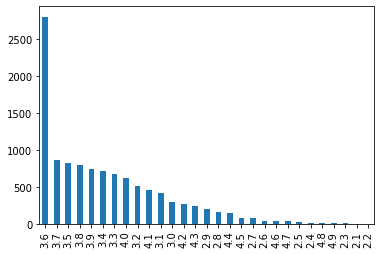

In [21]:
Ratings_count=df_train.Rating.value_counts()
Ratings_count.plot(kind='bar')

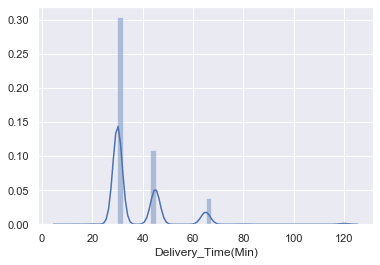

In [22]:
sns.set()
sns.distplot(df_train['Delivery_Time(Min)'])

In [23]:
df_train['Delivery_Time(Min)'].value_counts()

30     7403
45     2665
65      923
120      62
20       20
80       14
10        4
Name: Delivery_Time(Min), dtype: int64

In [24]:
df_train.groupby('Delivery_Time(Min)')['Average_Cost(₹)','Rating'].agg(['max','min'])

Average_Cost(₹)      Rating     
                               max  min    max  min
Delivery_Time(Min)                                 
10                             150  100    3.7  3.6
20                             250  100    4.2  2.9
30                             950    1    4.9  2.1
45                             950    1    4.9  2.3
65                             900    1    4.9  2.2
80                             400  100    4.2  3.0
120                            350   50    4.6  2.4

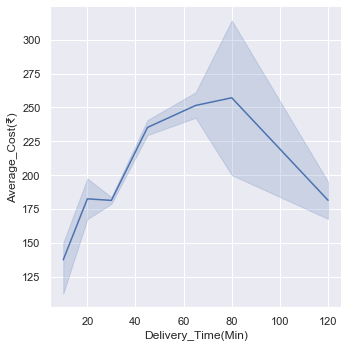

In [25]:
sns.relplot(x = 'Delivery_Time(Min)', y = 'Average_Cost(₹)', data = df_train,kind='line')

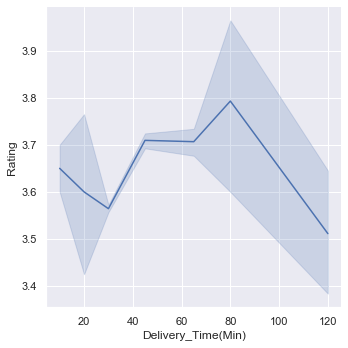

In [26]:
sns.relplot(x = 'Delivery_Time(Min)', y = 'Rating', data = df_train,kind='line')

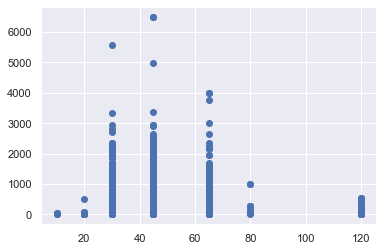

In [27]:
y=df_train['Reviews']
x=df_train['Delivery_Time(Min)']
plt.scatter(x,y)

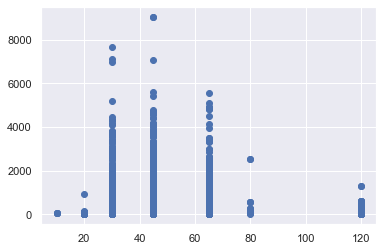

In [28]:
y=df_train['Votes']
x=df_train['Delivery_Time(Min)']
plt.scatter(x,y)

In [29]:
df_train.head()

,Location,Cuisines,Rating,Votes,Reviews,Average_Cost(₹),Restaurant ID,Minimum_Order(₹),Delivery_Time(Min)
0,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",3.5,12.0,4.0,200,6321,50,30
1,"Sector 3, Marathalli","Ice Cream, Desserts",3.5,11.0,4.0,100,2882,50,30
2,Mumbai Central,"Italian, Street Food, Fast Food",3.6,99.0,30.0,150,1595,50,65
3,"Sector 1, Noida","Mughlai, North Indian, Chinese",3.7,176.0,95.0,250,5929,99,30
4,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",3.2,521.0,235.0,200,6123,99,65


In [30]:
df_train['Average_Cost(₹)'].value_counts()

200    3241
100    2556
150    2462
250     881
300     537
350     283
400     282
50      265
600     153
500     101
450      63
550      60
650      55
800      44
750      38
1        23
900      15
700      15
850      12
950       4
2         1
Name: Average_Cost(₹), dtype: int64

In [31]:
df_train.drop(['Location','Cuisines'],axis=1,inplace=True)

df_test.drop(['Location','Cuisines'],axis=1,inplace=True)

In [32]:
df_train.shape , df_test.shape 

((11091, 7), (2774, 6))

In [33]:
df_train.head()

,Rating,Votes,Reviews,Average_Cost(₹),Restaurant ID,Minimum_Order(₹),Delivery_Time(Min)
0,3.5,12.0,4.0,200,6321,50,30
1,3.5,11.0,4.0,100,2882,50,30
2,3.6,99.0,30.0,150,1595,50,65
3,3.7,176.0,95.0,250,5929,99,30
4,3.2,521.0,235.0,200,6123,99,65


# Outliers_detection_ using IQR

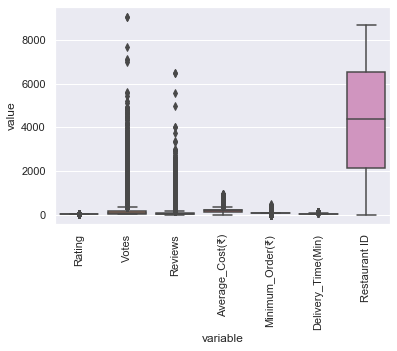

In [34]:
df = pd.DataFrame(data = df_train, columns = ['Rating','Votes','Reviews','Average_Cost(₹)',
                                               'Minimum_Order(₹)','Delivery_Time(Min)','Restaurant ID'])


ax=sns.boxplot(x="variable", y="value", data=pd.melt(df))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [35]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1

df_final = df_train[~((df_train < (Q1 - 1.5 * IQR)) |(df_train > (Q3 + 1.5 * IQR))).any(axis=1)]
df_final.shape 

(8262, 7)

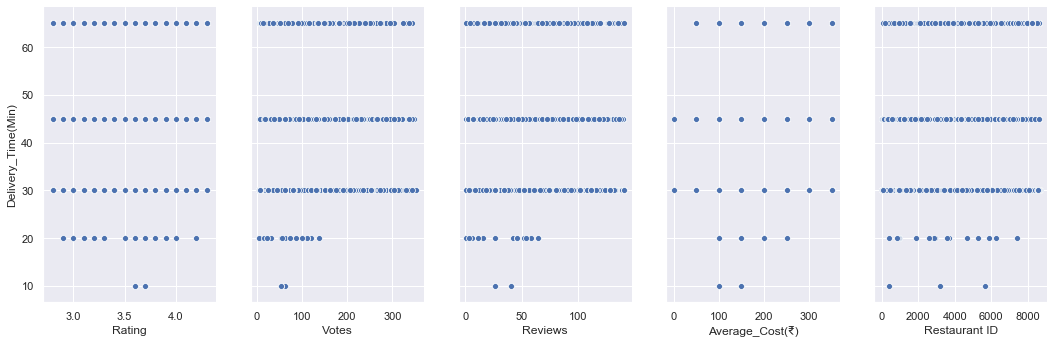

In [36]:
sns.pairplot(data=df_final, x_vars=['Rating','Votes','Reviews','Average_Cost(₹)','Restaurant ID'], y_vars='Delivery_Time(Min)',
             size=5, aspect=0.6, kind='scatter')

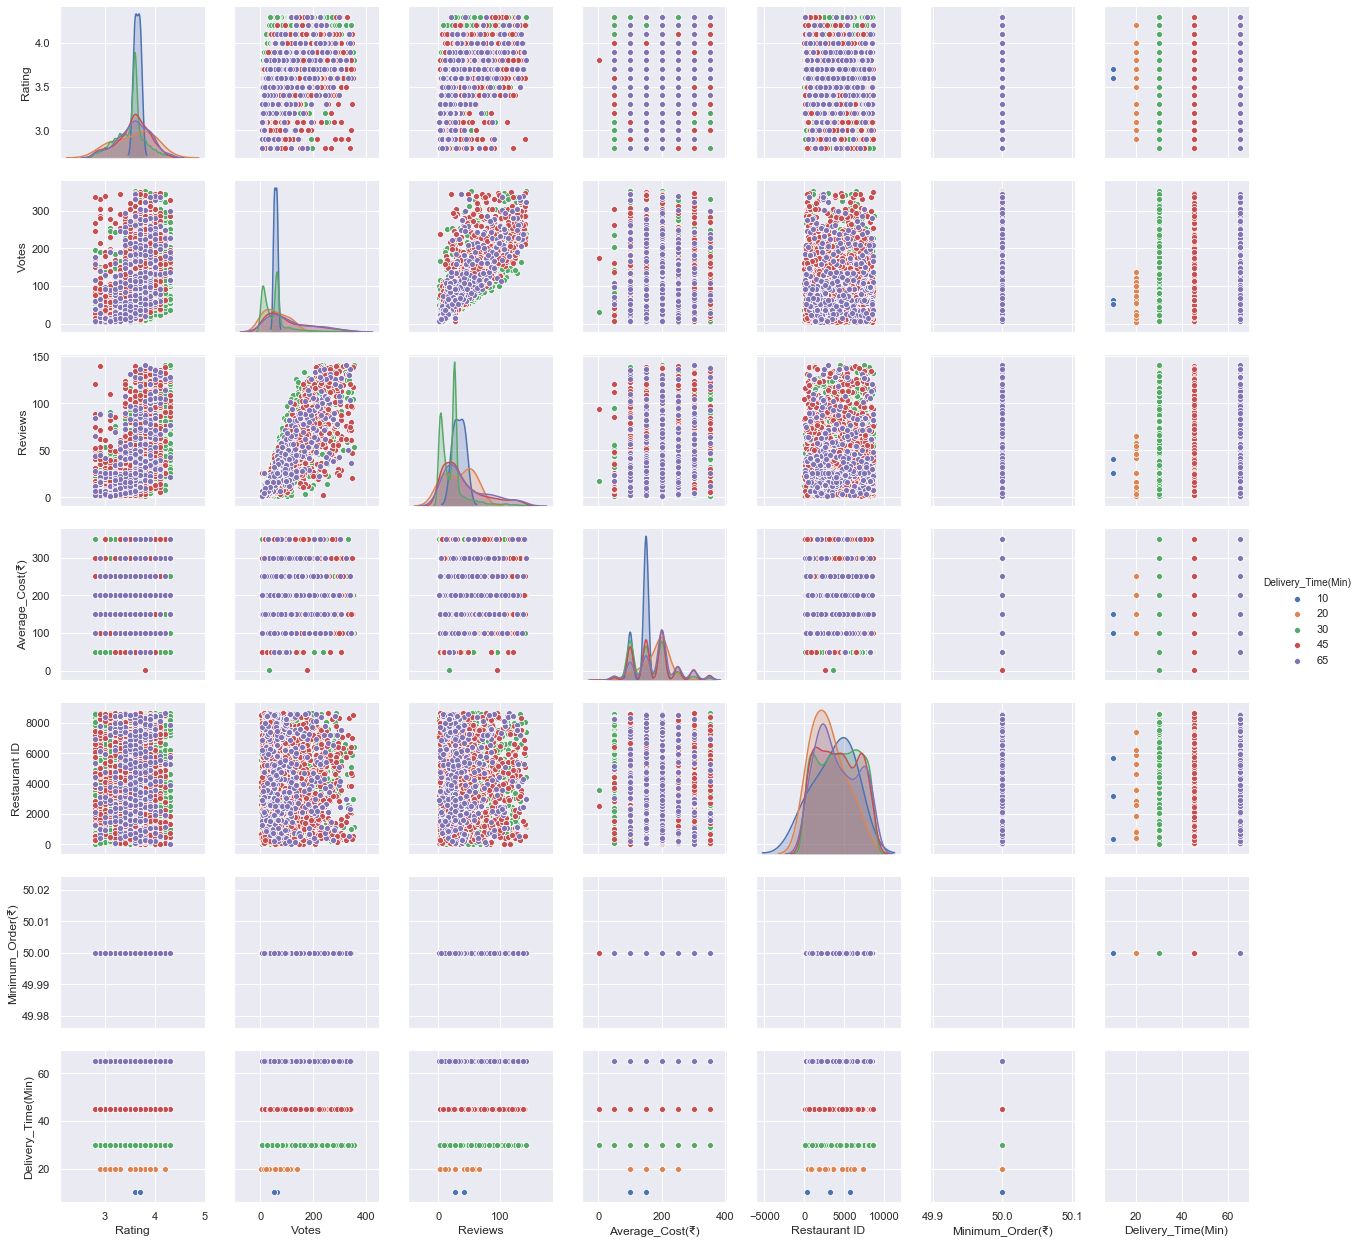

In [37]:
sns.pairplot(data=df_final,hue='Delivery_Time(Min)')

In [38]:
df_final.head()

,Rating,Votes,Reviews,Average_Cost(₹),Restaurant ID,Minimum_Order(₹),Delivery_Time(Min)
0,3.5,12.0,4.0,200,6321,50,30
1,3.5,11.0,4.0,100,2882,50,30
2,3.6,99.0,30.0,150,1595,50,65
5,3.8,46.0,18.0,150,5221,50,30
6,3.7,108.0,31.0,150,3777,50,30


# Applying model on Validation Set

In [ ]:
X=df_final.drop(['Delivery_Time(Min)'],axis=1)
y=df_final['Delivery_Time(Min)']

In [47]:
X=df_train.drop(['Delivery_Time(Min)'],axis=1)
y=df_train['Delivery_Time(Min)']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [49]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scale = sc_X.fit_transform(X_train)
X_test_scale = sc_X.transform(X_test)

In [50]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [200, 300, 400, 500, 600]
max_features = ['auto', 'sqrt']
max_depth = [20,40,50,60,80]
min_samples_split = [2, 5, 10,15,20]
min_samples_leaf = [1, 2, 3, 4, 5]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_cv = RandomizedSearchCV(estimator = RandomForestClassifier(), 
            param_distributions = random_grid, n_iter = 50,
            scoring = 'neg_mean_absolute_error', cv = 5, 
            verbose=5, random_state=42, n_jobs = -1,return_train_score = True)

random_cv.fit(X_train_scale,y_train)
random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  4.6min finished


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
rfc=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(X_train_scale,y_train) 
y_pred_rfc=rfc.predict(X_test_scale)
print("Accuracy Score : ",accuracy_score(y_test,y_pred_rfc))

Accuracy Score :  0.7990085624155024


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

base_score=[0.25,0.5,0.75,1]
n_estimators = [200, 300, 400, 500, 600]
max_depth = [4, 6, 8, 10, 12]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4,5]

random_grid_x =  {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

random_cv_x = RandomizedSearchCV(estimator = xgb.XGBClassifier(), 
            param_distributions = random_grid_x, n_iter = 50,
            scoring = 'neg_mean_absolute_error', cv = 5, 
            verbose=5, random_state=42, n_jobs = -1,return_train_score = True)

random_cv_x.fit(X_train,y_train)
random_cv_x.best_estimator_

In [52]:
xgb_final=xgb.XGBClassifier(base_score=1, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb_final.fit(X_train,y_train) 
y_pred_xgb=xgb_final.predict(X_test)
print("Accuracy Score : ",accuracy_score(y_test,y_pred_xgb))

Accuracy Score :  0.7908968003605228


# feature_importances_

In [55]:
def feat_importance(model, df):
    return pd.DataFrame({'Columns':df.columns, 'Imp_Features':model.feature_importances_}
                       ).sort_values('Imp_Features', ascending=False)

In [56]:
feat_importance(xgb_final,X_train)

,Columns,Imp_Features
5,Minimum_Order(₹),0.361942
1,Votes,0.203634
2,Reviews,0.117046
4,Restaurant ID,0.106886
0,Rating,0.105894
3,Average_Cost(₹),0.104598


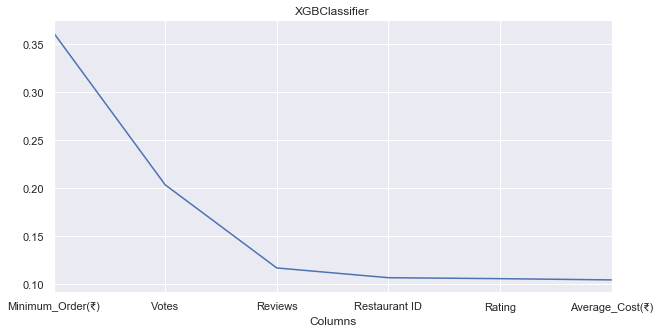

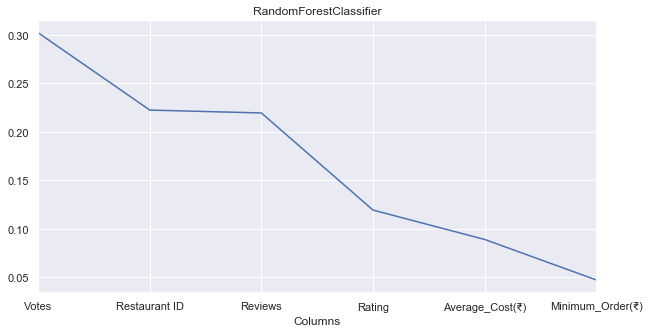

In [57]:
Fi_rfc=feat_importance(xgb_final,X_train)
Fi_rfc.plot('Columns', 'Imp_Features', figsize=(10,5), legend=False,title='XGBClassifier')

Fi_rfc=feat_importance(rfc,X_train)
Fi_rfc.plot('Columns', 'Imp_Features', figsize=(10,5), legend=False,title='RandomForestClassifier')

# Final_predictions_

In [61]:
X=df_train.drop(['Delivery_Time(Min)'],axis=1)
y=df_train['Delivery_Time(Min)']
random_cv_x.fit(X,y)
random_cv_x.best_estimator_

In [69]:
X_scale = sc_X.fit_transform(X)
df_test_scale=sc_X.fit_transform(df_test)

In [70]:
xgb_final=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_final.fit(X_scale,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#RandomForest
random_cv.fit(X,y)
random_cv.best_estimator_

In [67]:
rfc_final=RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc_final.fit(X_scale,y)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
y_pred_final=xgb_final.predict(df_test_scale)

In [72]:
final=pd.DataFrame()
final['Delivery_Time']=y_pred_final.tolist()

final['Delivery_Time'] = final['Delivery_Time'].astype(str)+ ' minutes' 

In [73]:
final.to_excel(r'C:\Users\lenovo\Desktop\IMS PRO\Sample_Submission.xlsx',index=False)